# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json


from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, MinMaxScaler
import seaborn as sns #For Data visualization
import matplotlib.pyplot as plt #Data plotting and visualization
sns.set_palette(sns.color_palette('Set2'))
import plotly.express as px
%matplotlib inline


In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
from datetime import datetime
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.cluster import KMeans

In [4]:
#Import functions
from clean_data import clean_portfolio, clean_profile, clean_transcript


portfolio_df = clean_portfolio(portfolio)
#portfolio_df = portfolio_df[['offer_reward', 'channels', 'offer_difficulty', 
                             #'offer_duration', 'offer_type', 'offer_id', 'offer_name']]

profile_da, profile_m = clean_profile(profile)
#profile_df = profile_df[['gender','age', 'customer_id','became_member_on','customer_income','membership_year','age_group']]

offers_df,transactions_df  = clean_transcript(transcript)


In [5]:
portfolio_df

,offer_id,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,bogo,10,7,10,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,bogo,10,5,10,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,offer_3,informational,0,4,0,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,bogo,5,7,5,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,discount,20,10,5,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_6,discount,7,7,3,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,offer_7,discount,10,10,2,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,offer_8,informational,0,3,0,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,bogo,5,5,5,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,offer_10,discount,10,7,2,1,1,0,1


In [6]:
#Store clean Portfolio data to portfoio_df
portfolio_df = clean_portfolio(portfolio)

#Store clean Profile data to profile_df
profile_df, profile_m = clean_profile(profile)

#Store clean transcript data to two seperate data frames. 
#Offers_df to store offer data, transactions_df to store transactions data
offers_df,transactions_df  = clean_transcript(transcript)

In [7]:
profile_df

,customer_id,gender,age,age_group,customer_income,customer_income_range,became_member_on,membership_year
0,0610b486422d4921ae7d2bf64640c50b,F,55,GenXers(44-56),112000.0,$100K,2017-07-15,2017
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,Boomers(57-75),100000.0,$100K,2017-05-09,2017
2,e2127556f4f64592b11af22de27a7932,M,68,Boomers(57-75),70000.0,"$50,000 - $74,999",2018-04-26,2018
3,389bc3fa690240e798340f5a15918d5c,M,65,Boomers(57-75),53000.0,"$50,000 - $74,999",2018-02-09,2018
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,Boomers(57-75),51000.0,"$50,000 - $74,999",2017-11-11,2017
...,...,...,...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,F,45,GenXers(44-56),54000.0,"$50,000 - $74,999",2018-06-04,2018
14821,2cb4f97358b841b9a9773a7aa05a9d77,M,61,Boomers(57-75),72000.0,"$50,000 - $74,999",2018-07-13,2018
14822,01d26f638c274aa0b965d24cefe3183f,M,49,GenXers(44-56),73000.0,"$50,000 - $74,999",2017-01-26,2017
14823,9dc1421481194dcd9400aec7c9ae6366,F,83,Matures(76+),50000.0,"$50,000 - $74,999",2016-03-07,2016


## RFM Analysis 

In this section we are going to perform Recency Frequency Monetary value analysis of the customer. 

RFM Analysis is a very commonly used method in marketing analytics to segments customers into homogeneous groups. The three variables used for RFM analysis are:

* **Recency**: When did the customer make the last purchase?

* **Frequency**: How frequently does the customer make a purchase?

* **Monetary**: How much has the customer spent?

These values can be collected from the customer's transaction data based on information like Date of purchase, money spent for each transactions.

In [8]:
#RFM Analysis

In [9]:
#Function to calcuate the most (R)ecent purchase,(F)requecny of purchase, and the (M)onetry sum of total purchase.

def rfm_funct(transactions = transactions_df):
    
    """
    INPUT :
        transactions : transactions_df(processed transctions data)
        
    RETURN :
        rfm_df : updated portfolio df with addtional col of name of each offer ids
        
    """
    
    rfm_df = transactions.groupby('customer_id').agg(
    {'time_in_days': 'max' ,'amount': ['count', 'sum'] }).reset_index(col_level=1)
    
    rfm_df.columns = ['customer_id' , 'time_in_days'  ,'Frequency', 'Monetary']
    
    rfm_df = rfm_df.sort_values(['time_in_days', 'Frequency', 'Monetary'], ascending=False)
    
    rfm_df['Recency']  = rfm_df['time_in_days'].max() - rfm_df['time_in_days']
    
    rfm_df = rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary']]
    
    return rfm_df


rfm_df = rfm_funct(transactions_df)

### Analyze RFM Dataset before scoring

In [10]:
rfm_df.sample(10)

,customer_id,Recency,Frequency,Monetary
4918,4bdd34a262b24807a6f327967aa42ea6,3,7,71.35
4402,43ab1831aeb0431f98efd3578f14bf67,6,2,72.11
3913,3c58128ef72145af98aa1d3b7d6b6906,4,8,87.35
16185,f9aa97d0dd164f8bae52c0a4f9dd9f6e,1,12,153.59
10011,99baac12030a4aa6acfc7f8c5453567d,4,2,52.11
1878,1e1bbc0184534a5180015c5e138ef85a,0,6,563.13
10688,a34313f47d9a4c9381937c4d778a49e3,5,4,8.42
14954,e6590c7f954f4ff482c069b45070b351,2,14,171.81
1560,18bffae1579b4f8598420ec807052cfa,2,17,728.51
11497,af9a7712bc024eeaa0533cfcff3e86aa,8,7,79.13


In [11]:
#Discriptive analysis
display(rfm_df.describe())

,Recency,Frequency,Monetary
count,16578.000000,16578.000000,16578.000000
mean,3.202015,8.381771,107.096874
std,3.442917,5.009822,126.393939
min,0.000000,1.000000,0.050000
25%,1.000000,5.000000,23.682500
50%,2.000000,7.000000,72.410000
75%,5.000000,11.000000,150.937500
max,29.000000,36.000000,1608.690000


In [12]:

def RFM_DistributionPlot(rfm_df = rfm_df):

    #Recency distribution

    plt.figure(figsize=[10,3])
    rfm_hist1 = sns.histplot(data = rfm_df, x = 'Recency',  multiple = "dodge",element = 'step', 
                            bins = 30, kde = True ,stat = 'count' ).set_title("Recency distribution")
    plt.xlabel("Recency")
    plt.ylabel("Customer count")


    #Frequency distribution

    plt.figure(figsize=[10,3])
    rfm_hist1 = sns.histplot(data = rfm_df, x = 'Frequency',  multiple = "dodge",element = 'step', 
                            bins = 20, kde = True ,stat = 'count' ).set_title("Frequency distribution")
    plt.xlabel("Frequency")
    plt.ylabel("Customer count")


    #Monetary distribution

    plt.figure(figsize=[10,3])
    rfm_hist1 = sns.histplot(data = rfm_df, x = 'Monetary',  multiple = "dodge",element = 'step', 
                            bins = 100, kde = True ,stat = 'count' ).set_title("Spend distribution")
    plt.xlabel("Monetary(USD)")
    plt.ylabel("Customer count")
    
    return rfm_hist1

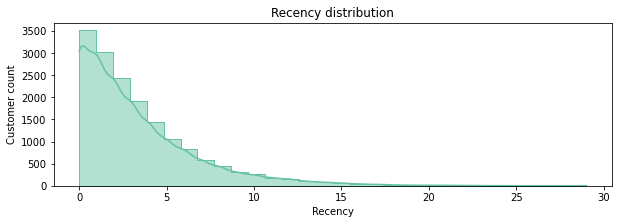

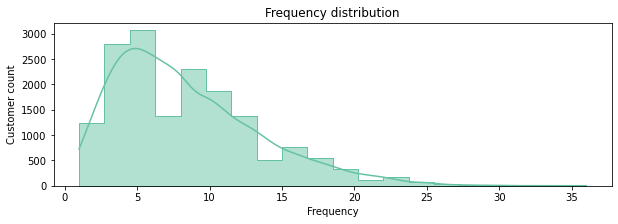

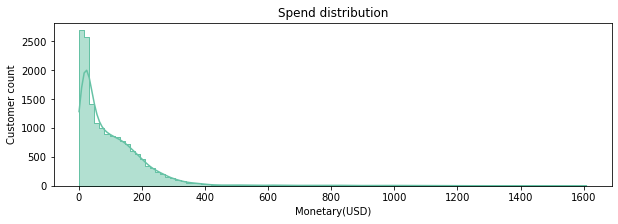

In [13]:
#RFM distribution

rfm_dist = RFM_DistributionPlot(rfm_df)

Based on the above graphs we can see that the Recency, Frequency and Monetary values are right-Skewed. 

* Recency mean value: ~ 3 days.
* Frequency mean value: ~ 8 purchases.
* Monetary mean value: USD 107

In [14]:
#Since the recency, frequency and monetary data is highly skewed to right. We perform normalization 
scaler = MinMaxScaler()
rfm_normalized = pd.DataFrame(scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']]))
rfm_normalized.columns = ['Recency', 'Frequency', 'Monetary']

In [15]:
from sklearn import preprocessing
d = preprocessing.normalize(rfm_df[['Recency', 'Frequency', 'Monetary']], axis=0)
scaled_df = pd.DataFrame(d, columns=['Recency', 'Frequency', 'Monetary'])

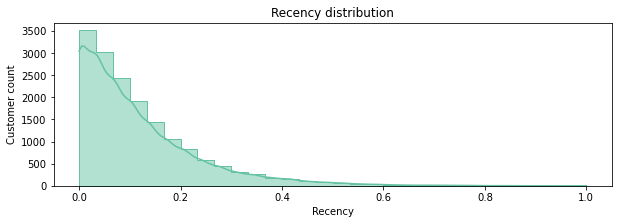

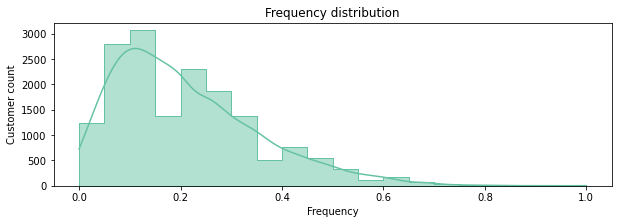

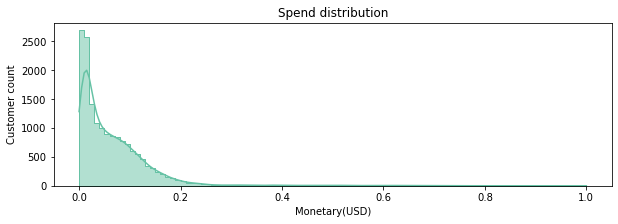

In [16]:
rfm_n_dist_test = RFM_DistributionPlot(rfm_normalized)

In [17]:
rfm_normalized

,Recency,Frequency,Monetary
0,0.000000,1.000000,0.107768
1,0.000000,0.971429,0.056060
2,0.000000,0.857143,0.286602
3,0.000000,0.828571,0.445818
4,0.000000,0.828571,0.162025
...,...,...,...
16573,0.896552,0.000000,0.015554
16574,0.931034,0.057143,0.032705
16575,0.931034,0.000000,0.010966
16576,0.931034,0.000000,0.009573


Text(0.5, 1.0, 'Correlation Heatmap')

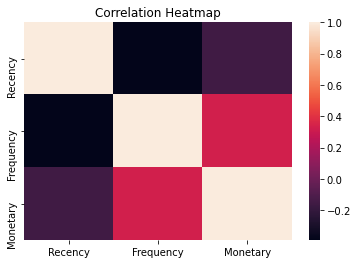

In [18]:
#Correlation between Recency, Frequency and monetary values

sns.heatmap(rfm_normalized.iloc[:,0:4].corr() )
plt.title('Correlation Heatmap')

We can observe:

* Correlation between Frequency and the Monetary value. 
* Negatve correlation between Recency and Monetary



### Computation of RFM

Here we are going to determing how to compute the Recency,Frequency and Monetary data values. 

Ther are few approcahes to do this. Here we are going to check two such approches and check which shows the best results. 

The two approaches that we are going to check are:

#### Method 1: 
Compute the RFM codes by using K-Means clusteing algorithm. 

#### Method 2: 
Sort customers based on R, F, M values and then combine into RFM codes using traditional method,then use K-means clustering to determine cluster. 



### Method1: Compute the RFM codes by using K-Means clusteing algorithm.

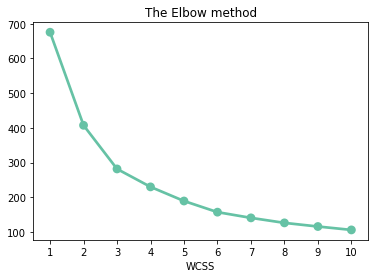

In [19]:
#Use elbow method to determine the optimum number of clusters needed for Method1

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)
    
sns.pointplot(x=list(range(1,11)), y=wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.xlabel('WCSS')
plt.show()

The WCSS value starts slowing down after the 4th cluster. 'Elbow' at k=4, thus the optimal number of cluster is 4. 

In [20]:
rfm_normalized

,Recency,Frequency,Monetary
0,0.000000,1.000000,0.107768
1,0.000000,0.971429,0.056060
2,0.000000,0.857143,0.286602
3,0.000000,0.828571,0.445818
4,0.000000,0.828571,0.162025
...,...,...,...
16573,0.896552,0.000000,0.015554
16574,0.931034,0.057143,0.032705
16575,0.931034,0.000000,0.010966
16576,0.931034,0.000000,0.009573


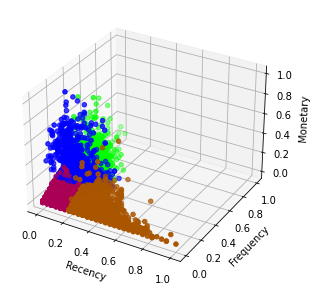

In [21]:
#Visualize the clusters in a 3-d scatter plot

kmeans = KMeans(n_clusters = 4,init = 'k-means++', random_state = 42)
kmeans.fit(rfm_normalized)
centers = kmeans.cluster_centers_

sns.set_palette(sns.color_palette('Set2'))

fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(rfm_normalized['Recency'],rfm_normalized['Frequency'],rfm_normalized['Monetary'], 
           cmap = 'brg', c=kmeans.predict(rfm_normalized))


ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

ax.scatter(centers[:,0], centers[:,1], c='black')

C:\Users\Arjun Achuthan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


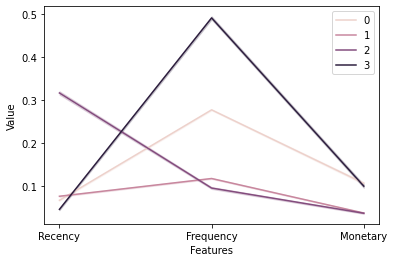

In [22]:
rfm_method1 = rfm_normalized.copy()#pd.DataFrame(scaler.inverse_transform(rfm_normalized))
#rfm_plot2.columns = rfm_df[['Recency', 'Frequency', 'Monetary']].columns
rfm_method1['Index_a'] = rfm_df.index
rfm_method1['cluster'] = kmeans.labels_

melted_rfm_normalized = pd.melt(rfm_method1.reset_index(), id_vars=['Index_a','cluster'],
                                value_vars = ['Recency', 'Frequency', 'Monetary'],
                                var_name = 'Features', value_name = 'Value')

sns.lineplot('Features', 'Value', hue = 'cluster', data = melted_rfm_normalized)
plt.legend()

In [24]:
rfm_df_method1 = rfm_df.copy()

rfm_df_method1['rfm_cluster']= rfm_method1['cluster'].copy()
rfm_df_method1

,customer_id,Recency,Frequency,Monetary,rfm_cluster
7887,79d9d4f86aca4bed9290350fb43817c2,0,36,173.41,1
9702,94de646f7b6041228ca7dec82adb97d2,0,35,90.23,0
10740,a42ed50acc4d4b25bca647c9e0b916ad,0,31,461.09,1
11192,ab25fd6fbd5040f880751921e4029757,0,30,717.21,0
13558,d0a80415b84c4df4908b8403b19765e3,0,30,260.69,0
...,...,...,...,...,...
6978,6ba58d2b211847d999213ea0b56b7f6a,26,1,25.07,0
14675,e20a018d829b41e5a01e46d71a6dd009,27,3,52.66,2
5957,5bf1841520a24a789b8addd9b383dad1,27,1,17.69,1
16227,fa6335ecdd5744dfbf4cbdfcae5414fd,27,1,15.45,2


In [25]:
rfm_df_method1.groupby('rfm_cluster').agg({
    'Recency': ['count','mean', 'median','min','max'],
    'Frequency': ['count','mean', 'median','min', 'max'],
    'Monetary': ['count','mean', 'median','min', 'max']
})

Recency                          Frequency                       \
              count      mean median min max     count      mean median min   
rfm_cluster                                                                   
0              5367  3.200671      2   0  29      5367  8.325694      7   1   
1              6308  3.235098      2   0  27      6308  8.381579      7   1   
2              2867  3.193931      2   0  27      2867  8.493198      8   1   
3              2036  3.114440      2   0  22      2036  8.373281      7   1   

                Monetary                                     
            max    count        mean  median   min      max  
rfm_cluster                                                  
0            36     5367  106.726844  72.110  0.05  1327.74  
1            36     6308  106.098031  71.865  0.05  1321.42  
2            29     2867  110.575145  75.960  0.05  1365.66  
3            29     2036  106.268998  71.015  0.10  1608.69

### Method 2: 
#### Using RFM ranking and then dividing the segments using K-means clustering of the ranked variabes. 

In [26]:
#Method 2:



#Assign recency variables to four equal quartile groups
r_labels = range(4,0,-1)
r_groups = pd.qcut(rfm_df['Recency'], q=4, labels= r_labels)
rfm_df['r_score'] = pd.DataFrame(r_groups)

#Assign recency variables to four equal quartile groups
f_labels = range(1,5)
f_groups = pd.qcut(rfm_df['Frequency'], q=4, labels= f_labels)
rfm_df['f_score'] = pd.DataFrame(f_groups)

#Assign recency variables to four equal quartile groups
m_labels = range(1,5)
m_groups = pd.qcut(rfm_df['Monetary'], q=4, labels= m_labels)
rfm_df['m_score'] = pd.DataFrame(m_groups)



In [27]:
rfm_df.head()

,customer_id,Recency,Frequency,Monetary,r_score,f_score,m_score
7887,79d9d4f86aca4bed9290350fb43817c2,0,36,173.41,4,4,4
9702,94de646f7b6041228ca7dec82adb97d2,0,35,90.23,4,4,3
10740,a42ed50acc4d4b25bca647c9e0b916ad,0,31,461.09,4,4,4
11192,ab25fd6fbd5040f880751921e4029757,0,30,717.21,4,4,4
13558,d0a80415b84c4df4908b8403b19765e3,0,30,260.69,4,4,4


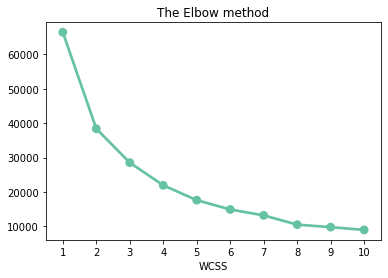

In [28]:
#Use elbow method to determine the optimum number of clusters needed for Method2
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_df.iloc[:,4:7])
    wcss.append(kmeans.inertia_)
    
sns.pointplot(x=list(range(1,11)), y=wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.xlabel('WCSS')
plt.show()

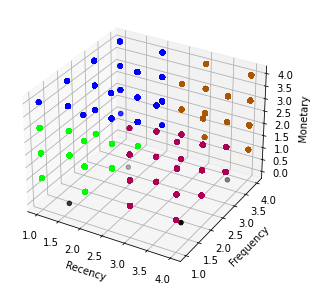

In [29]:
kmeans1 = KMeans(n_clusters = 4,init = 'k-means++', random_state = 42)
kmeans1.fit(rfm_df.iloc[:,4:7])
centers = kmeans1.cluster_centers_

fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(rfm_df['r_score'],rfm_df['f_score'],rfm_df['m_score'], 
           cmap = 'brg', c=kmeans1.predict(rfm_df.iloc[:,4:7]))

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

ax.scatter(centers[:,0], centers[:,1], c='black')

In [35]:
rfm_method2 = rfm_df.iloc[:,4:7] #pd.DataFrame(scaler.inverse_transform(rfm_normalized))
rfm_method2.columns = rfm_method2[['r_score', 'f_score', 'm_score']].columns
rfm_method2['index_a'] = rfm_df.index
rfm_method2['rfm_cluster'] = kmeans1.labels_

C:\Users\Arjun Achuthan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


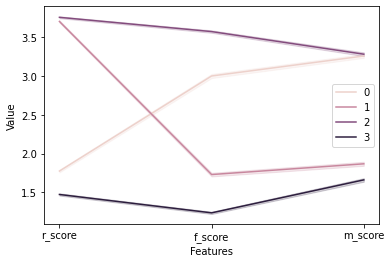

In [36]:
melted_rfm = pd.melt( rfm_method2, id_vars=['index_a','rfm_cluster'],
                                value_vars = ['r_score', 'f_score', 'm_score'],
                                var_name = 'Features', value_name = 'Value')

sns.lineplot('Features', 'Value', hue = 'rfm_cluster', data = melted_rfm)
plt.legend()

0 - Low recency , Hight frequency and High monetary = High value wih high risk of leaving

1 - High reency, low frequency and low monetary = New Customer

2 - High recency , high frequency and high monetary = Best Customer

3 - Low recency, low frequency and low monetary = Low value customer

In [37]:
rfm_df['rfm_segment']= rfm_method2['rfm_cluster'].copy()
rfm_df['rfm_cluster'] = rfm_method2['rfm_cluster'].copy()


In [38]:
rfm_df['rfm_segment'] = rfm_df['rfm_segment'].replace([0,1,2,3], ['High value/High risk','New Customer',
                                                                  'Best Customer','Low Value Customer'])


In [39]:
rfm_df.groupby('rfm_segment').agg({
    'Recency': ['count','mean', 'median','min','max'],
    'Frequency': ['count','mean', 'median','min', 'max'],
    'Monetary': ['count','mean', 'median','min', 'max']
})

Recency                          Frequency             \
                       count      mean median min max     count       mean   
rfm_segment                                                                  
Best Customer           4871  0.814822      1   0   2      4871  13.282899   
High value/High risk    3243  4.637064      4   2  18      3243  10.134135   
Low Value Customer      4456  6.807899      6   3  29      4456   4.082361   
New Customer            4008  0.933134      1   0   2      4008   5.787425   

                                    Monetary                              \
                     median min max    count        mean   median    min   
rfm_segment                                                                
Best Customer            13   6  36     4871  175.729388  157.270  12.91   
High value/High risk      9   2  29     3243  166.951230  145.970  14.43   
Low Value Customer        4   1  11     4456   38.623153   21.425   0.05   
New Customer              6   1  11     4008   51.383860   29.200   0.05   

                               
                          max  
rfm_segment                    
Best Customer         1608.69  
High value/High risk  1327.74  
Low Value Customer     150.63  
New Customer          1153.11

In [40]:
rfm_df.to_csv("rfm.csv")

### Now lets analyze demographics of each clusters

In [ ]:
profile_analysis = pd.merge(profile_df, rfm_df, left_on='customer_id', right_on='customer_id', how='inner')

In [ ]:
profile_analysis.head(4)

In [ ]:
profile_analysis_c0 = profile_analysis[profile_analysis['rfm_cluster']==0]
profile_analysis_c1 = profile_analysis[profile_analysis['rfm_cluster']==1]
profile_analysis_c2 = profile_analysis[profile_analysis['rfm_cluster']==2]
profile_analysis_c3 = profile_analysis[profile_analysis['rfm_cluster']==3]

In [ ]:
color_p = ["#2D2D2D", "#003f5c" , "#374c80", "#7a5195","#bc5090", "#ef5675","#ff764a","#ffa600"]

In [ ]:
#Age groups per segment
sns.set_palette(sns.color_palette('Dark2'))

fig, axs = plt.subplots( nrows = 2,ncols=2, figsize=(20, 10))

ax = sns.countplot(x='age_group',data=profile_analysis_c0,  ax= axs[0,0])
ax.set(title = 'High value/High risk')


ax = sns.countplot(x='age_group',data=profile_analysis_c1,  ax= axs[0,1])
ax.set( title = 'New Customer')

ax = sns.countplot(x='age_group',data=profile_analysis_c2,  ax= axs[1,0])
ax.set(title = 'Best Customer')

ax = sns.countplot(x='age_group',data=profile_analysis_c3,  ax= axs[1,1])
ax.set( title = 'Low Value Customer')


In [ ]:
#Gender distribution per segment


fig, axs = plt.subplots( nrows = 2,ncols=2, figsize=(25, 15))
sns.set_palette(sns.color_palette("Dark2"))

ax = sns.countplot(x= profile_analysis_c0['gender'], order = 
                   profile_analysis_c0['gender'].value_counts().index , ax= axs[0,0])
ax.set(title = 'High value/High risk')

ax = sns.countplot(x= profile_analysis_c1['gender'], order = 
                   profile_analysis_c1['gender'].value_counts().index , ax= axs[0,1])
ax.set( title = 'New Customer')

ax = sns.countplot(x= profile_analysis_c2['gender'], order = 
                   profile_analysis_c2['gender'].value_counts().index , ax= axs[1,0])
ax.set(title = 'Best Customer')

ax = sns.countplot(x= profile_analysis_c3['gender'], order = 
                   profile_analysis_c3['gender'].value_counts().index , ax= axs[1,1])
ax.set( title = 'Low Value Customer')


In [ ]:
profile_analysis.groupby(['rfm_segment', 'gender']).size() / profile_analysis.groupby(['rfm_segment']).size()

In [ ]:
#Income distribution by gender
sns.set_palette(sns.color_palette('Set2'))
plt.figure(figsize=[12,8])
sal_hist = sns.boxplot(data = profile_analysis, x = 'rfm_segment', y = 'customer_income' ).set_title("Seegment wise Customer Income distribution")
plt.ylabel("Salary(USD)")

In [ ]:
round(profile_analysis.groupby(['rfm_segment', 'gender'])['customer_income'].mean() )

In [ ]:
#Group the Membership year

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(20, 15))
sns.set_palette(sns.color_palette('Set2'))

ax = sns.countplot(x='membership_year',data=profile_analysis_c0, ax=axs[0,0]).set(title = 'High value/High risk')
ax = sns.countplot(x='membership_year',data=profile_analysis_c1, ax=axs[0,1]).set(title = 'New Customer')
ax = sns.countplot(x='membership_year',data=profile_analysis_c2, ax=axs[1,0]).set(title = 'Best Customer')
ax = sns.countplot(x='membership_year',data=profile_analysis_c3, ax=axs[1,1]).set(title = 'Low Value Customer')

### Offer analysis

In [ ]:
offers, transactions = clean_transcript(transcript)

In [ ]:
def offer_conversion(offers= offers):
    

    offer_stat = offers.groupby(['customer_id', 'offer_id']).agg({'received': 'sum' ,'viewed': 'sum' ,'completed': 'sum'})
    offer_stat.reset_index(level=[0,1], inplace=True)

    # Figure out if a offer was successful or not
    offer_success_temp = offer_stat['completed'] * offer_stat['viewed']
    offer_stat['offer_success'] = offer_success_temp.apply(lambda x: 1 if x > 0 else 0)
    
    offer_stat  = pd.merge(offer_stat, portfolio_df, left_on='offer_id', right_on='offer_id', how='inner')
    
    return offer_stat

offer_stat= offer_conversion(offers)

In [ ]:
offer_stat.head(6)

In [ ]:
offer_analysis = pd.merge(offer_stat, rfm_df, left_on='customer_id', right_on='customer_id', how='inner')
offer_analysis.head(20)

In [ ]:
#Acceptance rate per offer

plt.figure(figsize=[10,5])
sns.countplot(x= offer_analysis['rfm_segment'], hue = offer_analysis['offer_success'])

plt.title('Success rate per segment', fontsize=19)

Summary of the finding:


#### Segment 1: High value/High risk customers.

Frequent customers with heavy spending. But it has been considerabe time since their last transaction. 

* Most successful offers: offer_7, offer_6, offer_9
* Lesser cuccessful offer: offer_1, offer_4, offer_2
* Least successful offers: offer_5

#### Segment 2: New Customer

Rescent customers with lest spending and least frequency of shopping

* Most successful offers: offer_7, offer_6
* Lesser cuccessful offer: offer_4
* Least successful offers: offer_5, offer_10, offer_1, offer_2